# Импорт библиотек



In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Анализ данных

Загрузка датафрейма

In [ ]:
data = pd.read_html('/content/Выгрузка 9 апреля.xls')

In [ ]:
data[0].T[0]

0    Реквизиты документа
1    Реквизиты документа
2    Реквизиты документа
3    Реквизиты документа
4    Реквизиты документа
5    Реквизиты документа
6    Реквизиты документа
7    Реквизиты документа
Name: 0, dtype: object

In [ ]:
data[0].T[1].unique().tolist()

['Зарегистрирован в',
 'Союз "Агентство развития профессиональных сообществ и рабочих кадров "Молодые профессионалы (Ворлдскиллс Россия)"']

In [ ]:
data[0].T[2].unique().tolist()

['Документ создан в период', '2017-01-01 - 2019-12-31']

In [ ]:
df = data[1]

In [ ]:
df.head()

,№ п/п,№документа,Датарегистрации,Исх. №Дата,Адресат,Автор,Краткоесодержание,Примечание
0,1.0,WSR/1-838/2019,09.04.2019,208-40908.04.2019,Уразов Р.Н.,Антонова С.В. (АО «Интерфакс»),Вх - О возможности использования сетевого изда...,NaN
1,2.0,WSR/1-837/2019,09.04.2019,05-33809.04.2019,Уразов Р.Н.,Картошкин С.А. (Министерство просвещения Росси...,Вх - Об участии в совещании по вопросу доработ...,NaN
2,3.0,WSR/1-835/2019,09.04.2019,И10-14/313709.04.2019,Уразов Р.Н.,Цивилев С.Е. (Администрация Кемеровской области),Вх - О командировании Саликовой К. и Глушко Д....,NaN
3,4.0,WSR/1-834/2019,09.04.2019,Д2/7121-ИС03.04.2019,Иванюк Л.А.,Волков Г.А. (Министерство транспорта Российско...,Вх - Об участии в Чемпионате мира по профессио...,NaN
4,5.0,WSR/1-833/2019,09.04.2019,15-20/06-91108.04.2019,Уразов Р.Н.,Атанов И.В. (Ставропольский государственный аг...,Вх - Об участии в церемонии открытия Вузовског...,NaN


Удаляем '№ п/п', т.к. он не несет смысловой нагрузки, а в качестве нумерации рядов мы используем индексы

Размер датасета

In [ ]:
df.shape

(4967, 7)

Краткая информация

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4967 entries, 0 to 4966
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   №документа         4965 non-null   object
 1   Датарегистрации    4965 non-null   object
 2   Исх. №Дата         4967 non-null   object
 3   Адресат            4967 non-null   object
 4   Автор              4967 non-null   object
 5   Краткоесодержание  4967 non-null   object
 6   Примечание         308 non-null    object
dtypes: object(7)
memory usage: 271.8+ KB


In [ ]:
df.describe()

,№документа,Датарегистрации,Исх. №Дата,Адресат,Автор,Краткоесодержание,Примечание
count,4965,4965,4967,4967,4967,4967,308
unique,4953,372,4843,161,2013,3891,245
top,WSR/1-1785/2018,29.11.2017,Нет,Глушко Д.Е.,Черноскутова И.А. (Министерство образования и ...,Вх - О составе СМИ на WorldSkills Kazan 2019,приложение сшито
freq,2,42,10,1559,93,51,20


В ячейке выше мы можем увидеть, что небходимо определить 161 уникальный адресат писем

In [ ]:
df[df['Автор'].str.contains("Администрация Президента")]

,№документа,Датарегистрации,Исх. №Дата,Адресат,Автор,Краткоесодержание,Примечание
511,WSR/1-326/2019,20.02.2019,АЧ-207313.02.2019,Уразов Р.Н.,Вайно А.Э. (Администрация Президента Российско...,Вх - Об участии в заседании в Гостином Дворе 2...,NaN
513,WSR/1-324/2019,20.02.2019,А26-01-НО-1070877113.02.2019,Гонтарь М.А.,Байло Е. (Администрация Президента Российской ...,Вх - Об участии в оглашении Президентом Россий...,NaN
553,WSR/1-283/2019,13.02.2019,924.01.2019,Уразов Р.Н.,Голикова Т.А. (Администрация Президента Россий...,Вх - О направлении плана работы и протокола ор...,NaN
626,WSR/1-211/2019,06.02.2019,А26-02-НО-561997129.01.2019,Гонтарь М.А.,Байло Е. (Администрация Президента Российской ...,Вх - О получении приглашения на Мировой Чемпио...,NaN
698,WSR/1-140/2019,28.01.2019,А8-821-225.01.2019,Уразов Р.Н.,Тямушкин И. (Администрация Президента Российск...,Вх - О предоставлении информации о выполнении ...,NaN
701,WSR/1-136/2019,28.01.2019,А26-02-НО-301077118.01.2019,Уразов Р.Н.,Байло Е. (Администрация Президента Российской ...,Вх - О проведении встречи Президента Российско...,NaN
704,WSR/1-133/2019,28.01.2019,ТГ-П8-41823.01.2019,Уразов Р.Н.,Голикова Т.А. (Администрация Президента Россий...,"Вх - Об организации пограничного, таможенного ...",NaN
1008,WSR/1-3177/2018,12.12.2018,006412.12.2018,Уразов Р.Н.,Кириенко С.В. (Администрация Президента Россий...,Вх - Об посещении чемионата DigitalSkills в ка...,NaN
1027,WSR/1-3157/2018,11.12.2018,А77-120607.12.2018,Никул Е.В.Кононова Н.А.,Липов А.Ю. (Администрация Президента Российско...,Вх - О проведении отраслевого чемпионата по ст...,NaN
1159,WSR/1-3026/2018,27.11.2018,132/2307126.11.2018,Гонтарь М.А.,Кириенко С.В. (Администрация Президента Россий...,Вх - Об участии в межвузе 2018,NaN


In [ ]:
df[df['Адресат'].str.contains("Гонтарь")]

,№документа,Датарегистрации,Исх. №Дата,Адресат,Автор,Краткоесодержание,Примечание
138,WSR/1-699/2019,29.03.2019,172/3/435626.03.2019,Гонтарь М.А.,Цыганков А. (Министерство обороны Российской Ф...,Вх - Об участии в Чемпионате мира по профессио...,NaN
252,WSR/1-584/2019,20.03.2019,03ПА-2553019.03.2019,Гонтарь М.А.,Панков А.А. (Федеральная служба по надзору в с...,Вх - Об участии в Чемпионате мира по профессио...,NaN
374,WSR/1-463/2019,07.03.2019,3/19770139245606.03.2019,Гонтарь М.А.,Колесник В.В. (Управление по взаимодействию с ...,Вх - Об участии в Чемпионате мира по профессио...,NaN
513,WSR/1-324/2019,20.02.2019,А26-01-НО-1070877113.02.2019,Гонтарь М.А.,Байло Е. (Администрация Президента Российской ...,Вх - Об участии в оглашении Президентом Россий...,NaN
515,WSR/1-322/2019,19.02.2019,17/НТЦС04.02.2019,Гонтарь М.А.,"Орлова Н.А. (АНО ""Национальный центр трудовой ...","Вх - О направлении нового выпуска альманаха ""В...",NaN
...,...,...,...,...,...,...,...
4647,WSR/1-2059/2017,27.11.2017,03ПА-10833021.11.2017,Гонтарь М.А.,Панков А.А. (Федеральная служба по надзору в с...,Об участии в финале Первого Национального межв...,NaN
4691,WSR/1-2023/2017,24.11.2017,5579/01-03-1723.11.2017,Гонтарь М.А.,Аникеев А.С. (Министерство образования и науки...,Об участии в финале Первого Национального межв...,NaN
4696,WSR/1-2018/2017,24.11.2017,07/201724.11.2017,Гонтарь М.А.,Силинг А.Л. (Агентство стратегических инициати...,О составе Межвузовского координационного совета,NaN
4706,WSR/1-2008/2017,23.11.2017,55-к-20/1450023.11.2017,Гонтарь М.А.,Шевелева А.А. (Министерство образования Тульск...,Об участии в финале Первого Национального межв...,NaN


In [ ]:
df[df['Краткоесодержание'].str.contains("Региональный чемпионат")]# Краткоесодержание

,№документа,Датарегистрации,Исх. №Дата,Адресат,Автор,Краткоесодержание,Примечание
604,WSR/1-233/2019,07.02.2019,01/11207.02.2019,Глушко Д.Е.,"Степанова В.В. (ГАПОУ Саратовской области ""Сар...",Вх - О командировании Сумаковой Е. на IV Регио...,NaN
690,WSR/1-147/2019,28.01.2019,325.01.2019,Глушко Д.Е.,Калманов М.Б. (Комитет образования Еврейской а...,Вх - О пришглашении на II Региональный чемпион...,NaN
1426,WSR/1-2890/2018,14.11.2018,15/11/1807.11.2018,Уразов Р.Н.,Губайдуллин Э.Ф. (Автономная некоммерческая ор...,"Приглашение на Региональный чемпионат ""Молодые...",NaN
1521,WSR/1-2663/2018,29.10.2018,30529.10.2018,Уразов Р.Н.,Михайлова И.В. (Севастопольский центр развития...,Вх - О приглашении на III Региональный чемпион...,NaN
1620,WSR/1.10-2564/2018,22.10.2018,30/10/201819.10.2018,Тымчиков А.Ю.,Губайдуллин Э.Ф. (Автономная некоммерческая ор...,О направлении на Региональный чемпионат сотруд...,NaN
4126,WSR/1-57/2018,15.01.2018,17012.01.2018,Уразов Р.Н.,Адамова Н.В. (Министерство образования и науки...,Вх - О приглашении на IV Региональный чемпиона...,NaN
4141,WSR/1-42/2018,11.01.2018,08э/п11.01.2018,Тымчиков А.Ю.,"Волощук Л.В. (ГПОУ""Сыктывкарский политехническ...","Вх - О включении компетенций ""Туризм"", ""Предпр...",NaN
4144,WSR/1-38/2018,11.01.2018,05э/п10.01.2018,Тымчиков А.Ю.,"Волощук Л.В. (ГПОУ""Сыктывкарский политехническ...",Вх - О направлении сертифицированных экспертов...,NaN
4640,WSR/1-2066/2017,28.11.2017,9023/1-0124.11.2017,Уразов Р.Н.,Микрюкова И.В. (ГАУ ТО ЦЗН города Тюмени и Тюм...,О приглашении на Открытый Региональный чемпион...,NaN
4846,WSR/1.-1863/2017,13.11.2017,01-23/1019509.11.2017,Уразов Р.Н.,Масликова Э.Ф. (Министерство образования Оренб...,"Приглашение на Региональный чемпионат ""Молодые...",NaN


In [ ]:
df['Примечание'].isnull().sum()

4659

In [ ]:
df[~(df['Примечание'].isnull())]

,Датарегистрации,Адресат,Автор,Краткоесодержание,Примечание
10,08.04.2019,Крайчинская С.Б.,"Ажгиревич А.И. (ОООР ""Союз Машиностроителей Ро...",Вх - Об участии в заочном заседании Совета по ...,"Повестка заседания, а также материалы к нему, ..."
21,08.04.2019,Уразов Р.Н.,Без автора (Управление Президента Российской Ф...,Вх - Об участии в заседании рабочей группы по ...,поступило с эл. адреса prm_Bilenkina@gov.ru в ...
25,08.04.2019,Уразов Р.Н.,Потехина И.П. (Министерство просвещения Россий...,Вх - О предоставлении документов для заключени...,"срок до 6 апреля, письмо прислали 5 апр в 19:4..."
113,01.04.2019,Уразов Р.Н.,Пашков К.А. (Министерство транспорта Российско...,Вх - Об участии в совещании по вопросу достиже...,письмо получено 01.04.2019 - (Почта России)
115,01.04.2019,Глушко Д.Е.,"Томских А.А. (Министерство образования, науки ...",Вх - О направлении дорожной карты внедрения ре...,для передачи Уфимцеву/Дмитриеву
...,...,...,...,...,...
4935,03.11.2017,Уразов Р.Н.,"Климов Е.С. (ООО ""Эттон-Центр"")",Возражения на Отзыв Союза на Исковое завление,"Без приложений, т.к. письмо направлено в Арбит..."
4936,07.11.2017,Уразов Р.Н.,Равич К. (Министерство промышленной политики Р...,О приглашении на IV Чемпионат WorldSkills Hi-T...,Направлено Мироновой С.
4951,02.11.2017,Уразов Р.Н.,Соляников Ю.В. (Комитет по образованию Правите...,Об участии в мероприятиях IV Чемпионата WorldS...,Направлено Мироновой С.
4952,02.11.2017,Уразов Р.Н.,Зубов Д.Ю. (Министерство образования и науки К...,Об участии в IV Национальном чемпионате сквозн...,Направлено Глушко Д.Е.


In [ ]:
import re
result = re.findall(reg_fio, 'С.В.Кинайев Крайчинская С.Б. Пирогов В.И.')
result


['С.В.Кинайев', 'Крайчинская С.Б.', 'Пирогов В.И.']

In [ ]:
m = r'[А-Я][а-я]{1,20}\s[А-Я]\.[А-Я]\.'
#m = r'[А-Я][а-я]+-[А-Я][а-я]+\s+[А-Я]\.\s+[А-Я]\.' # Для двойных фамилий
reg_fio = r'([А-Я]\.[А-Я]\.\s?[А-Я][а-я]{1,20}|[А-Я][а-я]{1,20}\s?[А-Я]\.[А-Я]\.)'

In [ ]:
set(adres)

{'АбдулгалеевЗ.Т.',
 'АбдулганиевФ.С.',
 'АбдуллазяновЭ.Ю.',
 'АбдуллинА.М.',
 'АблязовК.А.',
 'АбязоваЮ.А.',
 'АгеевШ.Р.',
 'АкимовП.М.',
 'АлешинА.В.',
 'АлимовА.А.',
 'АнтипинС.А.',
 'АнтоновЮ.В.',
 'АртемоваТ.В.',
 'АфанасьевА.И.',
 'АфанасьевМ.П.',
 'АфанасьеваС.Н.',
 'АхметовМ.Г.',
 'АхметшинА.И.',
 'АхметшинА.С.',
 'АхметшинР.К.',
 'АштаеваК.Д.',
 'АюповаИ.Х.',
 'БагровЮ.Н.',
 'БадретдиновБ.М.',
 'БазерО.Э.',
 'БаковаЮ.В.',
 'БалтусоваО.А.',
 'БариевИ.И.',
 'БариевМ.М.',
 'БарышеваТ.Г.',
 'БастрыкинА.И.',
 'БезносиковаН.А.',
 'БогучарскаяА.С.',
 'БольшаковА.В.',
 'БородинИ.С.',
 'БортниковА.В.',
 'БулавинВ.И.',
 'БургановР.Т.',
 'ВазыховН.А.',
 'ВалеевД.Р.',
 'ВалитовИ.А.',
 'ВалиуллинА.А.',
 'ВалиуллинР.Н.',
 'ВасильеваО.Ю.',
 'ВахитовР.Р.',
 'ВишняковаО.Б.',
 'ВолковА.И.',
 'ВыборновА.А.',
 'ГабдрашитовБ.Р.',
 'ГабдурахмановЛ.Р.',
 'ГазизовА.Х.',
 'ГайдаевМ.И.',
 'ГайзатуллинР.Р.',
 'ГайнутдиновА.Р.',
 'ГалеевЭ.Г.',
 'ГалиуллинР.Ф.',
 'ГараевЗ.Ф.',
 'ГараеваА.Р.',
 'ГариповИ.М

In [ ]:
[i for i in df.Адресат.unique() if 'гд' in i.lower()]

['Гревцов А.Б.Шайхутдинов Р.А.Сафаров А.А.Абдулганиев Ф.С.Гайзатуллин Р.Р.Загидуллин Р.И.Ахметов М.Г.Хамаев А.К.Аюпова И.Х.Сафин Л.Р.Бурганов Р.Т.Зарипова Э.А.Хохорин А.В.Садыков М.Н.Файзуллин И.Э.Каримов А.А.Хабибуллин Р.З.Шадриков А.В.Фаттахов Д.И.Леонов В.А.Кузюров Р.А.Валиуллин А.А.РуководствоЯгфарова И.Ю.Абязова Ю.А.Коршиков Е.Ю.Грачев А.О.Маганов Н.У.Выборнов А.А.Огородников А.И.Сагитова А.М.Макаров В.В.Шайдуллин М.З.Гилманов К.К.Фаттахов Э.Н.Демидов С.А.Никошин А.Ф.Хайруллин А.Р.Загидуллин Р.Н.Нуриев И.Г.Хакимов Г.Г.Гатиятуллин Р.Х.Нутфуллин Р.Р.Закиров Л.Р.Зяббаров М.А.Зиатдинов М.Г.Калимуллин Р.Г.Гафаров М.Р.Емельянов Г.Е.Каримов Р.Г.Тыгин А.В.Магдеев Н.Г.Рахматуллин А.И.Вазыхов Н.А.Димитриев С.Д.Афанасьев М.П.Хусаинов Р.Г.Иванов А.П.Чершинцев В.С.Салахов А.Ф.Метшин И.Р.Муллин Р.Х.Метшин А.Р.Козлов В.М.Ахметшин А.С.Кашапов И.М.Тазутдинов И.Р.Минниханов Р.Н.Хуснуллин Ф.М.Нугаев К.А.Сафиуллов Р.Х.Камаев Ф.М.Зарипов И.Ф.Давлетшин Ф.М.Иванов Д.А.Нуриев Р.М.Тымчиков А.Ю.Рахимов И.С

# 1.1 Предобработка данных и выделение значимых атрибутов

In [ ]:
df = data[1].drop(['№ п/п','№документа','Исх. №Дата','Примечание'],axis=1)
df.head(2)

,Датарегистрации,Адресат,Автор,Краткоесодержание
0,09.04.2019,Уразов Р.Н.,Антонова С.В. (АО «Интерфакс»),Вх - О возможности использования сетевого изда...
1,09.04.2019,Уразов Р.Н.,Картошкин С.А. (Министерство просвещения Росси...,Вх - Об участии в совещании по вопросу доработ...


# 1.2 Разбиение сложных атрибутов


In [ ]:
# Удаляем пропущеннные значения, не трогая колонку Примечания
df = df.dropna(subset=['Датарегистрации']) # , №документа          

In [ ]:
adres = []
c = 0
reg_fio = r'([А-Я]\.[А-Я]\.\s?[А-Я][а-я]{1,20}|[А-Я][а-я]{1,20}\s?[А-Я]\.[А-Я]\.)'
for i in df.Адресат:
  result = re.findall(reg_fio, i)[-1] # Берем последнего адресата, т.к. это исправление [-1]
  # adres.append([i.replace(' ','') for i in result])
  adres.append(result.replace(' ',''))

df['Адресат(-ы)'] = adres
df.tail(2)

,Датарегистрации,Адресат,Автор,Краткоесодержание,Адресат(-ы)
4964,01.11.2017,Уразов Р.Н.,Огородова Л.М. (Министерство образования и нау...,Протокол заседания рабочей группы приоритетног...,УразовР.Н.
4965,01.11.2017,Уразов Р.Н.,Огородова Л.М. (Министерство образования и нау...,Протокол заседания рабочей группы приоритетног...,УразовР.Н.


In [ ]:
df['Адресат(-ы)'].unique().shape

(81,)

Создаем дополнительные признаки на основе краткого содержания и даты регистрации, из которой мы можем взять месяц отправки

Переводим дату в datetime, Анализируем датургестриации,

In [ ]:
df.Датарегистрации = pd.to_datetime(df.Датарегистрации)
df.Датарегистрации.describe()

count                    4965
unique                    372
top       2017-11-29 00:00:00
freq                       42
first     2017-01-11 00:00:00
last      2019-12-03 00:00:00
Name: Датарегистрации, dtype: object

Как мы можем увидеть, письма идут на протяжении практически трех лет. Моя гипотеза заключается в том, что в зависимости от месяца некоторый тип писем может повторяться, т.е. иметь одну сезнную определенную категорию.
Проверим гипотезу

In [ ]:
# создаем новый признак
# df['Месяц'] = df.Датарегистрации.apply(lambda x: str(x.month))
# # df.iloc[1000:1005,:]
# df = df.drop(['Месяц','Датарегистрации'],axis=1)

# Вытащили всех адресатов в новую колонку и удалили старую
df = df.drop('Адресат',axis=1)

In [ ]:
df.head()

,Автор,Краткоесодержание,Адресат(-ы)
0,Антонова С.В. (АО «Интерфакс»),Вх - О возможности использования сетевого изда...,[УразовР.Н.]
1,Картошкин С.А. (Министерство просвещения Росси...,Вх - Об участии в совещании по вопросу доработ...,[УразовР.Н.]
2,Цивилев С.Е. (Администрация Кемеровской области),Вх - О командировании Саликовой К. и Глушко Д....,[УразовР.Н.]
3,Волков Г.А. (Министерство транспорта Российско...,Вх - Об участии в Чемпионате мира по профессио...,[ИванюкЛ.А.]
4,Атанов И.В. (Ставропольский государственный аг...,Вх - Об участии в церемонии открытия Вузовског...,[УразовР.Н.]


Вытаскиваем Авторов (а именно предприятие, от которого исходит письмо)

In [ ]:
df['Агентсво'] = df.Автор.apply(lambda x: x.split('(')[1].replace(')',''))

In [ ]:
df.head(2)

,Датарегистрации,Адресат,Автор,Краткоесодержание,Адресат(-ы),Агентсво
0,09.04.2019,Уразов Р.Н.,Антонова С.В. (АО «Интерфакс»),Вх - О возможности использования сетевого изда...,УразовР.Н.,АО «Интерфакс»
1,09.04.2019,Уразов Р.Н.,Картошкин С.А. (Министерство просвещения Росси...,Вх - Об участии в совещании по вопросу доработ...,УразовР.Н.,Министерство просвещения Российской Федерации


In [ ]:
df.Агентсво.unique(), df.Агентсво.unique().shape

(array(['АО «Интерфакс»', 'Министерство просвещения Российской Федерации',
        'Администрация Кемеровской области', ...,
        'Департамент образования и молодежной политики Ханты-Мансийского автономного округа - Югры',
        'Военный комиссариат Свердловской области', 'Фонд "Сколково"'],
       dtype=object), (1481,))

In [ ]:
{'1','2','3'} | {'123'}

{'1', '123', '2', '3'}

Переписать список откуда и куда, сравнивать строки

In [ ]:
type_agents = []
target_one = ['Министерств','Правительств','Федеральн','Администр']
for i in df.Агентсво:
  br = 0
  for t in target_one:
    if br:
      break
    if t in i:
      br = 1
      type_agents.append(1)
  if not(br):
    type_agents.append(0)

In [ ]:
df['Тип_агентсва'] = type_agents
df.head()

,Датарегистрации,Автор,Краткоесодержание,Адресат(-ы),Агентсво,Тип_агентсва
0,2019-09-04,Антонова С.В. (АО «Интерфакс»),Вх - О возможности использования сетевого изда...,[УразовР.Н.],АО «Интерфакс»,0
1,2019-09-04,Картошкин С.А. (Министерство просвещения Росси...,Вх - Об участии в совещании по вопросу доработ...,[УразовР.Н.],Министерство просвещения Российской Федерации,1
2,2019-09-04,Цивилев С.Е. (Администрация Кемеровской области),Вх - О командировании Саликовой К. и Глушко Д....,[УразовР.Н.],Администрация Кемеровской области,1
3,2019-09-04,Волков Г.А. (Министерство транспорта Российско...,Вх - Об участии в Чемпионате мира по профессио...,[ИванюкЛ.А.],Министерство транспорта Российской Федерации,1
4,2019-09-04,Атанов И.В. (Ставропольский государственный аг...,Вх - Об участии в церемонии открытия Вузовског...,[УразовР.Н.],Ставропольский государственный аграрный универ...,0


Анализиурем форму составления краткого содержания

In [ ]:
df.Краткоесодержание[0]

'Вх - О возможности использования сетевого издания "Информационный ресурс СПАРК" в работе Союза'

In [ ]:
df.Краткоесодержание[4961]

'О заседании рабочей группы приоритетного проекта "Рабочие кадры для передовых технологий"'

In [ ]:
data[1]['№документа'].apply(lambda x: x.split('/')[0] if type(x)!=float else 'NaN').unique()

array(['WSR', 'NaN'], dtype=object)

In [ ]:
data[1]['№документа']

0         WSR/1-838/2019
1         WSR/1-837/2019
2         WSR/1-835/2019
3         WSR/1-834/2019
4         WSR/1-833/2019
              ...       
4962    WSR/1.-1749/2017
4963    WSR/1.-1751/2017
4964    WSR/1.-1748/2017
4965    WSR/1.-1747/2017
4966                 NaN
Name: №документа, Length: 4967, dtype: object

In [ ]:
df[df['Адресат'].str.contains("Начальник")]

,Датарегистрации,Адресат,Автор,Краткоесодержание,Месяц


# 1.4

In [ ]:
df.head()

,Автор,Краткоесодержание,Адресат(-ы),Агентсво,Тип_агентсва
0,Антонова С.В. (АО «Интерфакс»),Вх - О возможности использования сетевого изда...,[УразовР.Н.],АО «Интерфакс»,0
1,Картошкин С.А. (Министерство просвещения Росси...,Вх - Об участии в совещании по вопросу доработ...,[УразовР.Н.],Министерство просвещения Российской Федерации,1
2,Цивилев С.Е. (Администрация Кемеровской области),Вх - О командировании Саликовой К. и Глушко Д....,[УразовР.Н.],Администрация Кемеровской области,1
3,Волков Г.А. (Министерство транспорта Российско...,Вх - Об участии в Чемпионате мира по профессио...,[ИванюкЛ.А.],Министерство транспорта Российской Федерации,1
4,Атанов И.В. (Ставропольский государственный аг...,Вх - Об участии в церемонии открытия Вузовског...,[УразовР.Н.],Ставропольский государственный аграрный универ...,0


In [ ]:
top_five = df.Агентсво.value_counts()[:5]
bar_dict = {}
for i in top_five.reset_index().values:
  bar_dict[i[0]] = i[1]

In [ ]:
bard = pd.DataFrame(bar_dict, index=["Количество писем от адресантов"])
legends = ['Мин. обр.РФ. Деп-ент гос. политики р.к и ДПО','Мин. обр','Мин. просв.','Аппарат прав. РФ','Мин обр. Тульской обл.']

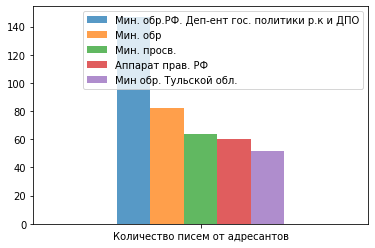

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
bard.plot(kind='bar', ax=ax,alpha=0.75, rot=0)
ax.legend(legends);

In [ ]:
pie_val

array([2978, 1989])

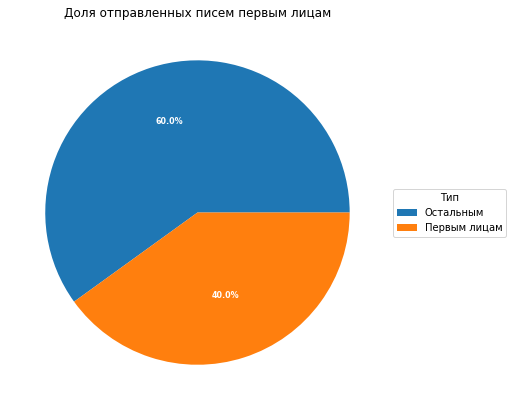

In [ ]:

fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(aspect="equal"))


pie_val = df.Тип_агентсва.value_counts().reset_index().values
data = [i[1] for i in pie_val]
ingredients = ['Остальным','Первым лицам']


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n".format(pct)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))
ax.legend(wedges, ingredients,
          title="Тип",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=8, weight="bold")
ax.set_title("Доля отправленных писем первым лицам")
plt.show()

облако слов

In [ ]:
!pip install pymorphy2
!pip install -U pymorphy2-dicts-ru

In [ ]:
!git clone https://github.com/amueller/word_cloud.git
!pip install '/content/word_cloud'

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import pymorphy2
from nltk.corpus import stopwords
morph = pymorphy2.MorphAnalyzer()
stopwords_ru = stopwords.words('russian')

def normal_rus(w):
    res = morph.parse(w)
    for r in res:
        if 'NOUN' in r.tag:
          if r.normal_form not in stopwords_ru:
            return r.normal_form
          return None
    return None

from collections import Counter

c_dict = Counter()
for s in df.Краткоесодержание.values:
    for w in s.split():
             n = normal_rus(w)
             if n is not None:
                c_dict[n] += 1

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


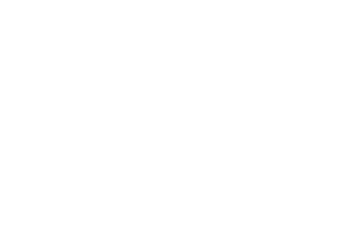

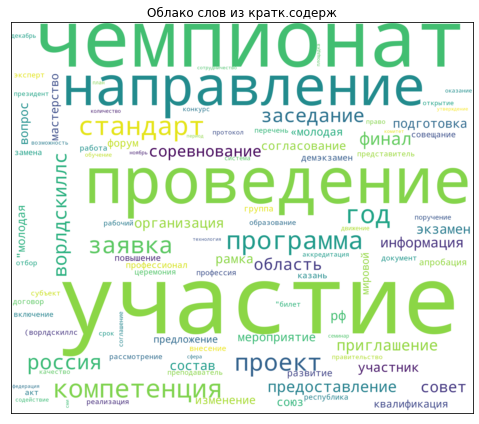

In [ ]:
common = c_dict.most_common(100)
wc = WordCloud(width=2600, height=2200, background_color="white", relative_scaling=1.0,
               collocations=False, min_font_size=10).generate_from_frequencies(dict(common))
plt.axis("off")
plt.figure(figsize=(9, 6))
plt.imshow(wc, interpolation="bilinear")
plt.title("Облако слов из кратк.содерж")
plt.xticks([])
plt.yticks([])
plt.tight_layout()
# file_name = 'habr-words-%d.png' % year
plt.show()

In [ ]:

# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself

LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
        
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, 'ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.030508 -0.035693       1        1  15.379238
5      0.093009  0.032052       2        1  14.256154
1     -0.004767 -0.070373       3        1  14.188698
8      0.007462 -0.027049       4        1  11.423775
6      0.022104  0.008424       5        1   9.670329
9     -0.046445 -0.023101       6        1   8.221854
0     -0.046604  0.030616       7        1   7.904202
4     -0.001608  0.015188       8        1   6.866223
3     -0.029058  0.025409       9        1   6.802813
7     -0.024602  0.044526      10        1   5.286714, topic_info=              Term        Freq       Total Category  logprob  loglift
6405     выпекания   30.000000   30.000000  Default  30.0000  30.0000
4986      растении   37.000000   37.000000  Default  29.0000  29.0000
768      диаграммы   45.000000   45.000000  Default  28.0000  28.0000
7716  автогреидера   19.000000   19.000000  Default  27.0000  27.0000
232        правила  159.000000  159.000000  Default  26.0000  26.0000
...            ...         ...         ...      ...      ...      ...
74        важность    6.128610  300.200701  Topic10  -6.0226  -0.9515
43         проблем    5.414288  106.592491  Topic10  -6.1465  -0.0400
15    использовать    5.635034  214.681126  Topic10  -6.1066  -0.7002
491      различные    5.312578  101.023234  Topic10  -6.1655  -0.0053
232        правила    5.355121  159.923855  Topic10  -6.1575  -0.4567

[815 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
6792      4  0.777089         adas
3268      1  0.068100           ar
3268      2  0.272399           ar
3268      4  0.068100           ar
3268      8  0.544797           ar
...     ...       ...          ...
608      10  0.034126  эффективнои
6104      2  0.297611  юридические
6104     10  0.595222  юридические
3216      9  0.399440    юстировку
5205      6  0.517070      ягодных

[2203 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 6, 2, 9, 7, 10, 1, 5, 4, 8])